In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

Códigos para gráficos de especialización en machine learning, coursera, Andrew Ng.

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/UChile/ML/Labs/clase_02"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-b1d77a9b1015>", line 3, in <cell line: 3>
    get_ipython().run_line_magic('cd', '"/content/drive/MyDrive/UChile/ML/Labs/clase_02"')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local

Mismo ejemplo del cuaderno

In [3]:
x_train = np.array([1,2,3])
y_train = np.array([1,0.5,2])

Calculo de la función de pérdida

In [ ]:
def funcion_de_perdida(x: np.array, y: np.array, theta_1: float, theta_0: float):
    '''
      Función que calcula el valor de pérdida/costo asociado al modelo.
      También conocido como error cuadrático.
    '''
    n = x.shape[0]
    perdida = 0

    for i in range(n):
        q_theta = theta_1 * x[i] + theta_0
        perdida = perdida + (q_theta - y[i])**2 # acumulo el valor de pérdida
    perdida_total = 1 / (2 * n) * perdida

    return perdida_total

Cálculo de las derivadas - gradientes

In [ ]:
def calculo_de_derivadas(x, y, theta_1, theta_0):
    """
    Cálculo del gradiente para el problema de regresión lineal.
    Argumentos:
      x (ndarray (n,)): datos, n ejemplos
      y (ndarray (n,)): valores objetivos
      theta_1,theta_0 (escalares)    : parámetros del modelo
    Returna
      dj_d_theta_1 (escalar): gradiente de la función de perdida para el parámetro theta_1 respecto de la data de entrenamiento.
      dj_d_theta_0 (escalar): gradiente de la función de perdida para el parámetro theta_0 respecto de la data de entrenamiento.
     """

    # Número de ejemplos de entrenamiento
    n = x.shape[0]
    # Inicializando los gradientes en cero
    dj_d_theta_1 = 0
    dj_d_theta_0 = 0

    # cálculo de los gradientes
    for i in range(n):
        g_theta = theta_1 * x[i] + theta_0
        dj_d_theta_1_i = (g_theta - y[i]) * x[i]
        dj_d_theta_0_i = g_theta - y[i]
        dj_d_theta_1 += dj_d_theta_1_i
        dj_d_theta_0 += dj_d_theta_0_i
    dj_d_theta_1 = dj_d_theta_1 / n
    dj_d_theta_0 = dj_d_theta_0 / n

    return dj_d_theta_1, dj_d_theta_0

Funciones importadas para el plot

In [ ]:
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

Observemos solo los gradientes

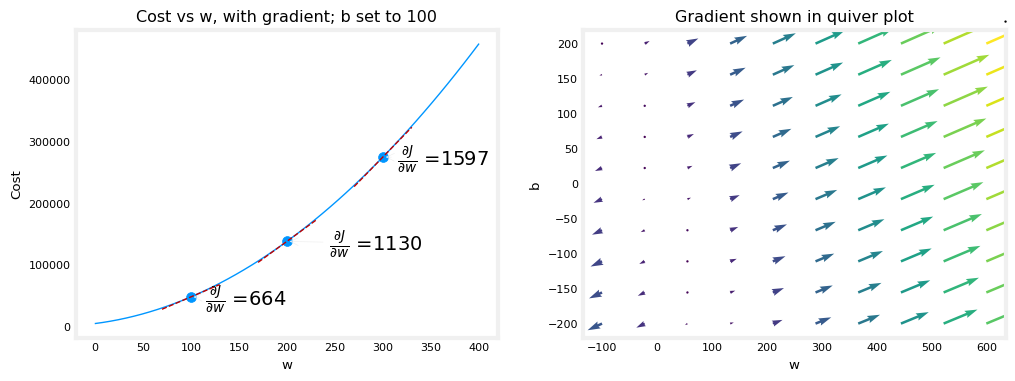

In [ ]:
plt_gradients(x_train,y_train, funcion_de_perdida, calculo_de_derivadas)
plt.show()

Construyamos el método de Gradiente Descendiente

In [ ]:
def gradiente_descendiente(x, y, theta_1_in, theta_0_in, alpha, num_iters, funcion_de_perdida, calculo_de_derivadas):
    """
    Realiza el Gradiente Descendiente para calcular theta_1 y theta_0. Actualiza los valores theta_1,theta_0
    realizando num_iters pasos de gradiente con una tasa de aprendizaje alpha

    Argumentos:
      x (ndarray (n,))  : Datos, n ejemplos
      y (ndarray (n,))  : valores objetivo
      theta_1_in,theta_0_in (scalar): valores iniciales de los parámetros.
      alpha (float):     tasa de aprendizaje
      num_iters (int):   número de iteraciones del gradiente descendiente.
      funcion_de_perdida:     funcion_de_perdida.
      calculo_de_derivadas: cálculo de derivadas.

    Returna:
      theta_1 (escalar): valor actualizado del parámetro tras correr el gradiente
      theta_0 (escalar): valor actualizado del parámetro tras correr el gradiente
      J_historia (List): historia de los valores de pérdida
      p_historia (List): historia de los parámetros actualizados [theta_1,theta_0]
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_historia = []
    theta_historia = []
    theta_0 = theta_0_in
    theta_1 = theta_1_in

    for i in range(num_iters):
        # Calculamos el gradiente de los parámetros
        dj_d_theta_1, dj_d_theta_0 = calculo_de_derivadas(x, y, theta_1 , theta_0)

        # actualizamos los parámetros utilizando las ecuaciones
        theta_0= theta_0 - alpha * dj_d_theta_0
        theta_1 = theta_1 - alpha * dj_d_theta_1

        # salvamos la pérdida en cada iteración
        if i<100000:      # prevenimos un número de iteraciones mayores a 100K
            J_historia.append(funcion_de_perdida(x, y, theta_1 , theta_0))
            theta_historia.append([theta_1,theta_0])
        # Si hay menos de 10 iteraciones imprimimos cada valor obtenido, en caso contrario cada 10 iteraciones.
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_historia[-1]:0.2e} ",
                  f"dj_d_theta_1: {dj_d_theta_1: 0.3e}, dj_d_theta_0: {dj_d_theta_0: 0.3e}  ",
                  f"theta_1: {theta_1: 0.3e}, theta_0:{theta_0: 0.5e}")

    return theta_1, theta_0, J_historia, theta_historia #retornamos los parámetros, las historias para poder graficar.

In [ ]:
# inicializando los parámetros theta
theta_0_init = 0
theta_1_init = 0
# algunas configuraciones del algoritmo
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
theta_1, theta_0, J_historia, theta_historia = gradiente_descendiente(x_train ,y_train, theta_1_init, theta_0_init, tmp_alpha,
                                                    iterations, funcion_de_perdida, calculo_de_derivadas)
print(f"(theta_1,theta_0) found by gradient descent: ({theta_1:8.4f},{theta_0:8.4f})")

Iteration    0: Cost 7.93e-01  dj_d_theta_1: -2.667e+00, dj_d_theta_0: -1.167e+00   theta_1:  2.667e-02, theta_0: 1.16667e-02
Iteration 1000: Cost 1.11e-01  dj_d_theta_1: -7.091e-04, dj_d_theta_0:  1.612e-03   theta_1:  4.941e-01, theta_0: 1.80061e-01
Iteration 2000: Cost 1.11e-01  dj_d_theta_1: -2.130e-04, dj_d_theta_0:  4.842e-04   theta_1:  4.982e-01, theta_0: 1.70690e-01
Iteration 3000: Cost 1.11e-01  dj_d_theta_1: -6.398e-05, dj_d_theta_0:  1.454e-04   theta_1:  4.995e-01, theta_0: 1.67875e-01
Iteration 4000: Cost 1.11e-01  dj_d_theta_1: -1.922e-05, dj_d_theta_0:  4.369e-05   theta_1:  4.998e-01, theta_0: 1.67030e-01
Iteration 5000: Cost 1.11e-01  dj_d_theta_1: -5.773e-06, dj_d_theta_0:  1.312e-05   theta_1:  5.000e-01, theta_0: 1.66776e-01
Iteration 6000: Cost 1.11e-01  dj_d_theta_1: -1.734e-06, dj_d_theta_0:  3.942e-06   theta_1:  5.000e-01, theta_0: 1.66699e-01
Iteration 7000: Cost 1.11e-01  dj_d_theta_1: -5.209e-07, dj_d_theta_0:  1.184e-06   theta_1:  5.000e-01, theta_0: 1.66

Observemos el historial de pérdidas que almacenamos

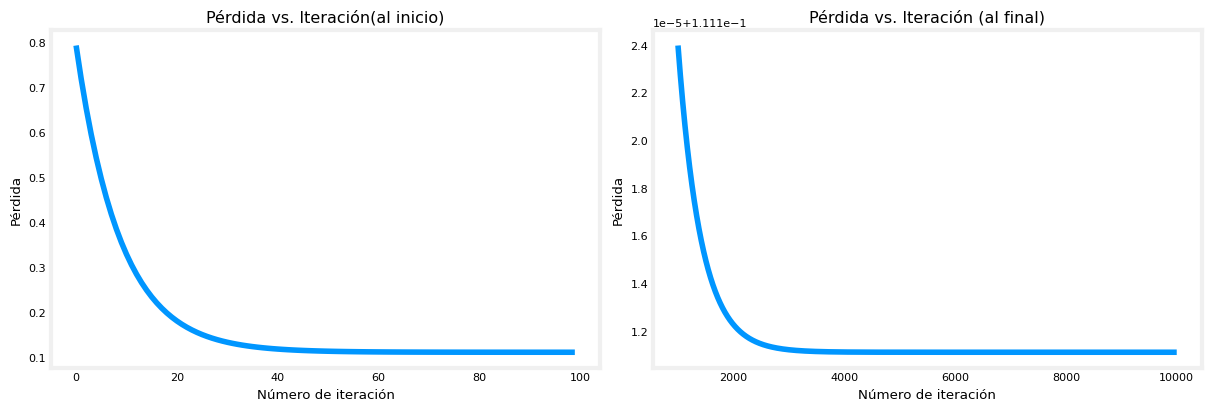

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_historia[:100])
ax2.plot(1000 + np.arange(len(J_historia[1000:])), J_historia[1000:])
ax1.set_title("Pérdida vs. Iteración(al inicio)");  ax2.set_title("Pérdida vs. Iteración (al final)")
ax1.set_ylabel('Pérdida')            ;  ax2.set_ylabel('Pérdida')
ax1.set_xlabel('Número de iteración')  ;  ax2.set_xlabel('Número de iteración')
plt.show()

# Otro Ejemplo

Observemos como progresó el gradiente a través de los contornos de la función de pérdida para un nuevo ejemplo

In [ ]:
# Otro Ejemplo
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value
# inicializando los parámetros theta
theta_0_init = 0
theta_1_init = 0
# algunas configuraciones del algoritmo
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
theta_1, theta_0, J_historia, theta_historia = gradiente_descendiente(x_train ,y_train, theta_1_init, theta_0_init, tmp_alpha,
                                                    iterations, funcion_de_perdida, calculo_de_derivadas)
print(f"(theta_1,theta_0) found by gradient descent: ({theta_1:8.4f},{theta_0:8.4f})")

Iteration    0: Cost 7.93e+04  dj_d_theta_1: -6.500e+02, dj_d_theta_0: -4.000e+02   theta_1:  6.500e+00, theta_0: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_d_theta_1: -3.712e-01, dj_d_theta_0:  6.007e-01   theta_1:  1.949e+02, theta_0: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_d_theta_1: -1.789e-01, dj_d_theta_0:  2.895e-01   theta_1:  1.975e+02, theta_0: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_d_theta_1: -8.625e-02, dj_d_theta_0:  1.396e-01   theta_1:  1.988e+02, theta_0: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_d_theta_1: -4.158e-02, dj_d_theta_0:  6.727e-02   theta_1:  1.994e+02, theta_0: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_d_theta_1: -2.004e-02, dj_d_theta_0:  3.243e-02   theta_1:  1.997e+02, theta_0: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_d_theta_1: -9.660e-03, dj_d_theta_0:  1.563e-02   theta_1:  1.999e+02, theta_0: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_d_theta_1: -4.657e-03, dj_d_theta_0:  7.535e-03   theta_1:  1.999e+02, theta_0: 1.00

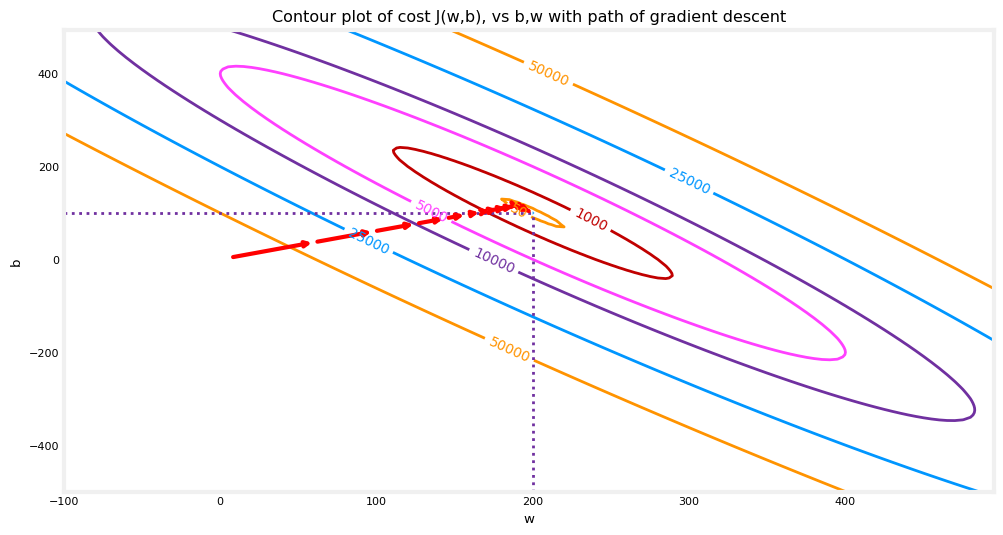

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, theta_historia, ax)

Zoom cerca del minimo

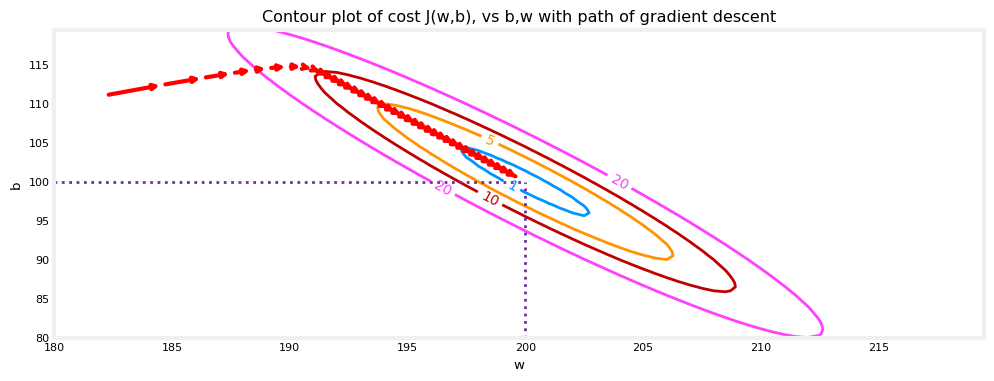

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, theta_historia, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

# Modifica el learning rate

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradiente_descendiente(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, funcion_de_perdida, calculo_de_derivadas)

Iteration    0: Cost 2.58e+05  dj_d_theta_1: -6.500e+02, dj_d_theta_0: -4.000e+02   theta_1:  5.200e+02, theta_0: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_d_theta_1:  1.130e+03, dj_d_theta_0:  7.000e+02   theta_1: -3.840e+02, theta_0:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_d_theta_1: -1.970e+03, dj_d_theta_0: -1.216e+03   theta_1:  1.192e+03, theta_0: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_d_theta_1:  3.429e+03, dj_d_theta_0:  2.121e+03   theta_1: -1.551e+03, theta_0:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_d_theta_1: -5.974e+03, dj_d_theta_0: -3.691e+03   theta_1:  3.228e+03, theta_0: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_d_theta_1:  1.040e+04, dj_d_theta_0:  6.431e+03   theta_1: -5.095e+03, theta_0:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_d_theta_1: -1.812e+04, dj_d_theta_0: -1.120e+04   theta_1:  9.402e+03, theta_0: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_d_theta_1:  3.156e+04, dj_d_theta_0:  1.950e+04   theta_1: -1.584e+04, theta_0:-9.80

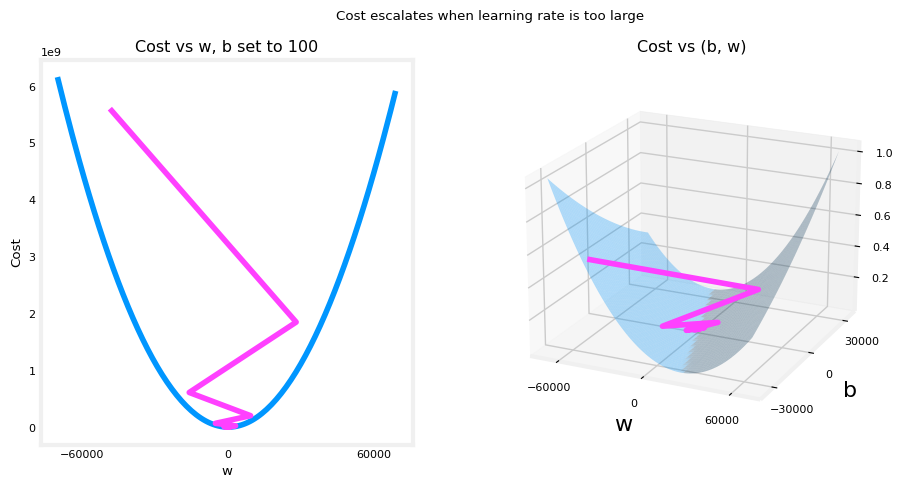

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()